# Beer Consumption and Student Well-Being Analysis
In this notebook, we will analyze the relationships between beer consumption, academic performance, happiness, and well-being among students.
The datasets include beer consumption data, student well-being metrics, and academic performance. We will answer the following guiding questions:
- How does beer consumption correlate with academic performance (GPA)?
- Is there a threshold of beer consumption that affects well-being?
- Does attending more social events influence beer consumption and well-being?
- What advice can be given to students based on the findings?


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
students_df = pd.read_csv('data/students.csv')
beer_consumption_df = pd.read_csv('data/beer_consumption.csv')
well_being_df = pd.read_csv('data/well_being.csv')
events_df = pd.read_csv('data/events.csv')

# Display first few rows of each dataset
display(students_df.head())
display(beer_consumption_df.head())
display(well_being_df.head())
display(events_df.head())


,student_id,age,gender,major,GPA,credits_completed
0,S001,24,Female,Social Sciences,2.366870,101
1,S002,22,Male,Science,2.311989,104
2,S003,20,Female,Social Sciences,3.202230,53
3,S004,20,Female,Social Sciences,3.939820,59
4,S005,23,Female,Business,2.366809,105


,student_id,date,beers_consumed
0,S001,2024-09-18 16:46:43.729780,3
1,S001,2024-09-19 16:46:43.729780,3
2,S001,2024-09-20 16:46:43.729780,3
3,S001,2024-09-21 16:46:43.729780,0
4,S001,2024-09-22 16:46:43.729780,0


,student_id,happiness_score,sleep_hours,social_life_score
0,S001,5.646486,1.618509,6.317967
1,S002,-0.078793,1.276101,7.202604
2,S003,1.287888,4.631307,9.473340
3,S004,1.879905,5.766821,6.575488
4,S005,0.212553,3.847128,4.613447


,event_id,event_date,event_type,average_beer_consumed
0,E001,2024-10-17 16:46:43.729780,Sports Event,4.722200
1,E002,2024-09-18 16:46:43.729780,Study Group,9.127963
2,E003,2024-09-25 16:46:43.729780,Party,8.597785
3,E004,2024-10-05 16:46:43.729780,Party,2.819156
4,E005,2024-09-19 16:46:43.729780,Party,2.410675


## 1. Correlation Between Beer Consumption and GPA
We will analyze whether higher levels of beer consumption correlate with lower GPA or if moderate consumption has different effects.

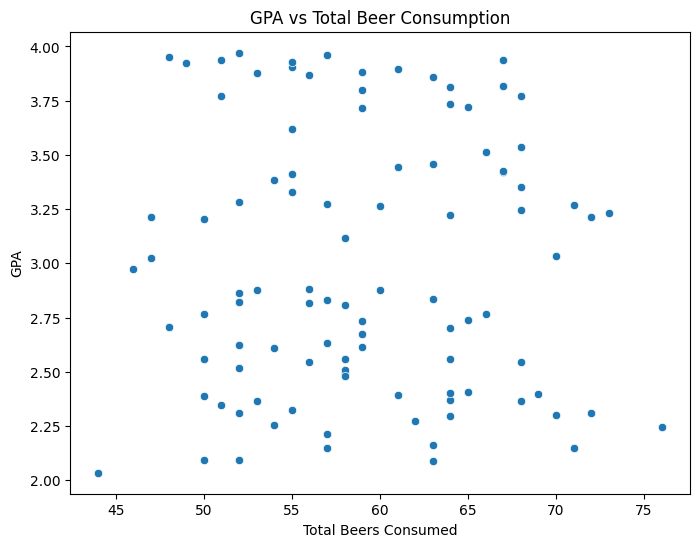

In [2]:
# Merge beer consumption and students data
beer_consumption_summary = beer_consumption_df.groupby('student_id')['beers_consumed'].sum().reset_index()
students_merged = pd.merge(students_df, beer_consumption_summary, on='student_id')

# Scatter plot of GPA vs total beer consumption
plt.figure(figsize=(8, 6))
sns.scatterplot(x='beers_consumed', y='GPA', data=students_merged)
plt.title('GPA vs Total Beer Consumption')
plt.xlabel('Total Beers Consumed')
plt.ylabel('GPA')
plt.show()

## 2. Threshold Analysis for Beer Consumption and Well-Being
Here, we will analyze whether there is a threshold for beer consumption that affects happiness, sleep, and social life. We will classify students into light, moderate, and heavy drinkers.

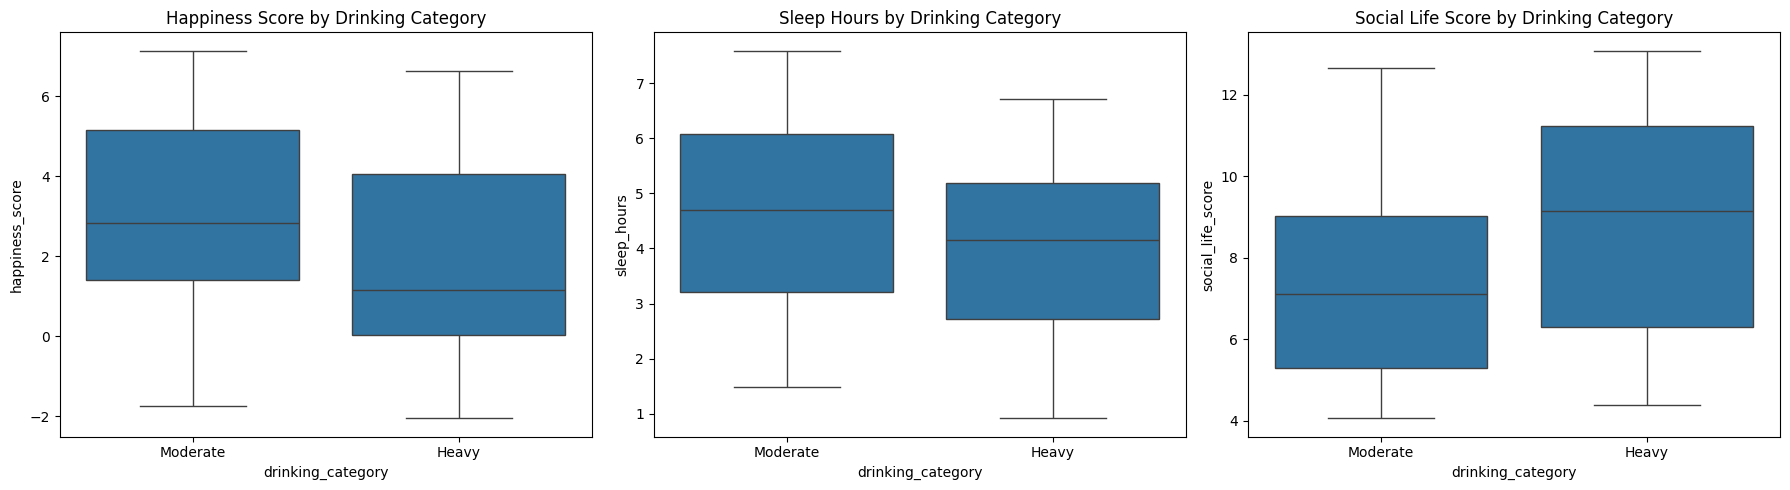

In [3]:
# Classify students as light, moderate, and heavy drinkers
conditions = [
    (students_merged['beers_consumed'] <= 30),  # Light drinkers
    (students_merged['beers_consumed'] > 30) & (students_merged['beers_consumed'] <= 60),  # Moderate drinkers
    (students_merged['beers_consumed'] > 60)  # Heavy drinkers
]
choices = ['Light', 'Moderate', 'Heavy']
students_merged['drinking_category'] = np.select(conditions, choices)

# Merge well-being data
students_well_being = pd.merge(students_merged, well_being_df, on='student_id')

# Boxplot of happiness, sleep, and social life by drinking category
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='drinking_category', y='happiness_score', data=students_well_being)
plt.title('Happiness Score by Drinking Category')

plt.subplot(1, 3, 2)
sns.boxplot(x='drinking_category', y='sleep_hours', data=students_well_being)
plt.title('Sleep Hours by Drinking Category')

plt.subplot(1, 3, 3)
sns.boxplot(x='drinking_category', y='social_life_score', data=students_well_being)
plt.title('Social Life Score by Drinking Category')

plt.tight_layout()
plt.show()

## 3. Impact of Attending Social Events on Beer Consumption and Well-Being
Let's explore whether attending more events leads to higher beer consumption and how it affects well-being.

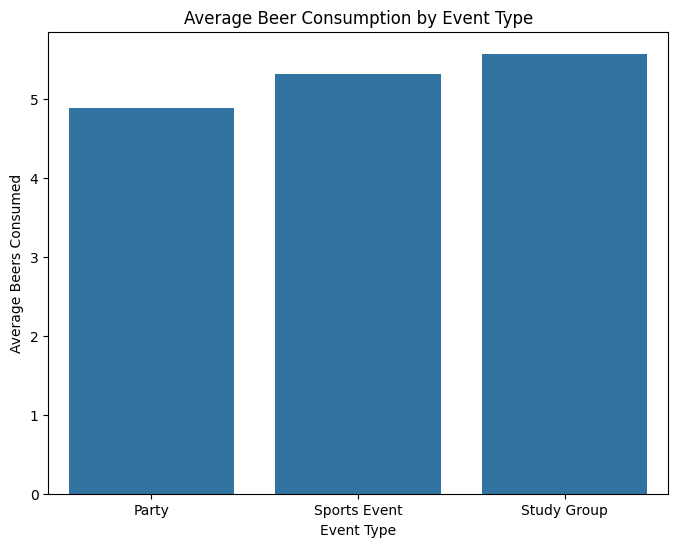

In [4]:
# Correlate event attendance with beer consumption
beer_by_event = events_df.groupby('event_type')['average_beer_consumed'].mean().reset_index()

# Plot average beer consumption by event type
plt.figure(figsize=(8, 6))
sns.barplot(x='event_type', y='average_beer_consumed', data=beer_by_event)
plt.title('Average Beer Consumption by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Beers Consumed')
plt.show()

## 4. Recommendations Based on Findings
Based on the analysis, provide recommendations to students to help them maintain a balance between social life, well-being, and academic success.